In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv(r'/home/paree/Machine Learning/Jupyter Notebooks/Machine Learning/train.csv')
test=pd.read_csv(r'/home/paree/Machine Learning/Jupyter Notebooks/Machine Learning/test.csv')
submission=pd.read_csv(r'/home/paree/Machine Learning/Jupyter Notebooks/Machine Learning/gender_submission.csv')
pid=submission['PassengerId']

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
submission.shape

(418, 2)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [12]:
train.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [13]:
train.shape

(891, 12)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
train=train.drop(['PassengerId','Name','Ticket'], axis=1)

In [17]:
test=test.drop(['PassengerId','Name','Ticket'], axis=1)

In [18]:
train['Embarked']=train['Embarked'].fillna('S')

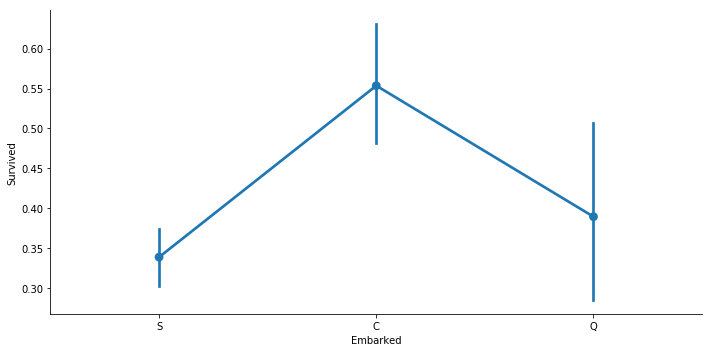

In [19]:
sns.catplot('Embarked','Survived',data=train,kind='point',aspect=2)

In [20]:
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7efec820b950>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Categorical distribution plots

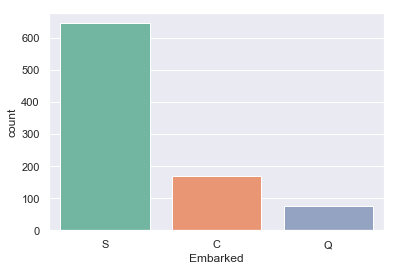

In [21]:
sns.set()
sns.countplot('Embarked',data=train,palette=sns.color_palette('Set2',14))

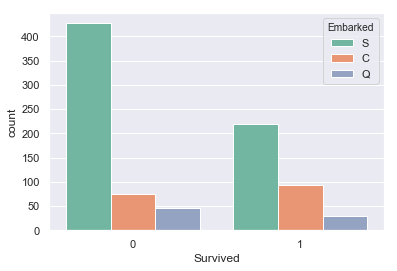

In [22]:
sns.countplot('Survived',hue='Embarked',data=train,palette=sns.color_palette('Set2',14))

In [23]:
embarked=train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()
embarked.head()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


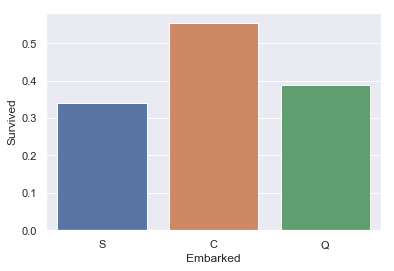

In [24]:
sns.barplot(x='Embarked',y='Survived',data=embarked,order=['S','C','Q'])

In [25]:
train=train.drop('Embarked',axis=1)
test=test.drop('Embarked',axis=1)

In [26]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
dtype: int64

In [27]:
test.isnull().sum()

Pclass      0
Sex         0
Age        86
SibSp       0
Parch       0
Fare        1
Cabin     327
dtype: int64

In [28]:
train=train.drop('Cabin',axis=1)
test=test.drop('Cabin',axis=1)

In [29]:
train['Age']=train['Age'].fillna(train['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())

In [30]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [31]:
test.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      1
dtype: int64

In [32]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [33]:
test.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [34]:
train.shape

(891, 7)

In [35]:
test.shape

(418, 6)

In [36]:
submission.shape

(418, 2)

In [37]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [38]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

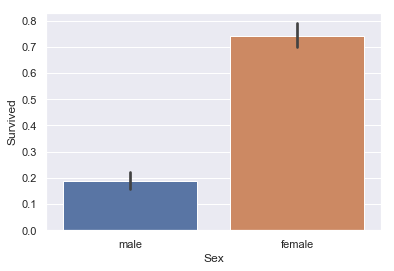

In [39]:
sns.barplot(x="Sex",y="Survived",data=train)

In [40]:
train=pd.get_dummies(train, columns = ["Sex"])

In [41]:
test=pd.get_dummies(test, columns = ["Sex"])

In [42]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [43]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0


In [44]:
print(train.shape)
print(test.shape)
print(submission.shape)

(891, 8)
(418, 7)
(418, 2)


In [45]:
print(train.dtypes)
print(test.dtypes)

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
dtype: object
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
dtype: object


In [46]:
X=train.iloc[:,1:]
Y=train['Survived']

In [47]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


In [48]:
X.shape

(891, 7)

In [49]:
Y.shape

(891,)

In [50]:
Y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=31)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(623, 7)
(268, 7)
(623,)
(268,)


In [54]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=16)
model=KNN.fit(X_train,Y_train)
prediction=model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
KNNval=accuracy_score(Y_test,prediction)
print(KNNval)
Valscores=list()
Valscores.append(KNNval)

0.7089552238805971


In [56]:
sub1=submission.drop('PassengerId',axis=1)

In [57]:
sub1.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [58]:
testpredict=model.predict(test)

In [59]:
KNNtest=accuracy_score(sub1,testpredict)
print(KNNtest)
Testscores=[KNNtest]

0.69377990430622


In [60]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
model1=DT.fit(X_train,Y_train)
prediction=model1.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
DTval=accuracy_score(Y_test,prediction)
print(DTval)
Valscores.append(DTval)

0.7574626865671642


In [62]:
testpredict=model1.predict(test)
DTtest=accuracy_score(sub1,testpredict)
print(DTtest)
Testscores.append(DTtest)

0.7870813397129187


In [63]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
model2=RF.fit(X_train,Y_train)
prediction=model2.predict(X_test)

/home/paree/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [64]:
from sklearn.metrics import accuracy_score
RFval=accuracy_score(Y_test,prediction)
print(RFval)
Valscores.append(RFval)

0.75


In [65]:
testpredict=model2.predict(test)
RFtest=accuracy_score(sub1,testpredict)
print(RFtest)
Testscores.append(RFtest)

0.80622009569378


In [66]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
model3=GB.fit(X_train,Y_train)
prediction=model3.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
GBval=accuracy_score(Y_test,prediction)
print(GBval)
Valscores.append(GBval)

0.8432835820895522


In [68]:
testpredict=model3.predict(test)
GBtest=accuracy_score(sub1,testpredict)
print(GBtest)
Testscores.append(GBtest)

0.8421052631578947


In [69]:
from sklearn.svm import SVC
SVM=SVC(kernel='rbf',gamma=0.05,C=2)
model4=SVM.fit(X_train,Y_train)
prediction=model4.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
SVMval=accuracy_score(Y_test,prediction)
print(SVMval)
Valscores.append(SVMval)

0.753731343283582


In [71]:
testpredict=model4.predict(test)
SVMtest=accuracy_score(sub1,testpredict)
print(SVMtest)
Testscores.append(SVMtest)

0.7583732057416268


In [72]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
model5=LR.fit(X_train,Y_train)
prediction=model5.predict(X_test)

/home/paree/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
from sklearn.metrics import accuracy_score
LRval=accuracy_score(Y_test,prediction)
print(LRval)
Valscores.append(LRval)

0.7873134328358209


In [74]:
testpredict=model5.predict(test)
LRtest=accuracy_score(sub1,testpredict)
print(LRtest)
Testscores.append(LRtest)

0.9521531100478469


In [75]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
model6=NB.fit(X_train,Y_train)
prediction=model6.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
NBval=accuracy_score(Y_test,prediction)
print(NBval)
Valscores.append(NBval)

0.7686567164179104


In [77]:
testpredict=model6.predict(test)
NBtest=accuracy_score(sub1,testpredict)
print(NBtest)
Testscores.append(NBtest)

0.9497607655502392


In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA=LinearDiscriminantAnalysis()
model7=LDA.fit(X_train,Y_train)
prediction=model7.predict(X_test)

/home/paree/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [79]:
from sklearn.metrics import accuracy_score
LDAval=accuracy_score(Y_test,prediction)
print(LDAval)
Valscores.append(LDAval)

0.7910447761194029


In [80]:
testpredict=model7.predict(test)
LDAtest=accuracy_score(sub1,testpredict)
print(LDAtest)
Testscores.append(LDAtest)

0.9736842105263158


In [81]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
model8=XGB.fit(X_train,Y_train)
prediction=model8.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
XGBval=accuracy_score(Y_test,prediction)
print(XGBval)
Valscores.append(XGBval)

0.8395522388059702


In [83]:
testpredict=model8.predict(test)
XGBtest=accuracy_score(sub1,testpredict)
print(XGBtest)
Testscores.append(XGBtest)

0.8732057416267942


In [84]:
print(Valscores)

[0.7089552238805971, 0.7574626865671642, 0.75, 0.8432835820895522, 0.753731343283582, 0.7873134328358209, 0.7686567164179104, 0.7910447761194029, 0.8395522388059702]


In [85]:
print(Testscores)

[0.69377990430622, 0.7870813397129187, 0.80622009569378, 0.8421052631578947, 0.7583732057416268, 0.9521531100478469, 0.9497607655502392, 0.9736842105263158, 0.8732057416267942]


In [86]:
Models=['KNN','Decision Tree','Random Forest','GradientBoost','SVC','Logistic Regression','Naive Bayes','LDA','XGB']

In [87]:
len(Models)

9

In [88]:
d=dict()
df=pd.DataFrame(d)

In [89]:
df

""


In [90]:
df['Models']=Models

In [91]:
df

,Models
0,KNN
1,Decision Tree
2,Random Forest
3,GradientBoost
4,SVC
5,Logistic Regression
6,Naive Bayes
7,LDA
8,XGB


In [92]:
df['Valscores']=Valscores

In [93]:
df['Testscores']=Testscores

In [94]:
df

,Models,Valscores,Testscores
0,KNN,0.708955,0.693780
1,Decision Tree,0.757463,0.787081
2,Random Forest,0.750000,0.806220
3,GradientBoost,0.843284,0.842105
4,SVC,0.753731,0.758373
5,Logistic Regression,0.787313,0.952153
6,Naive Bayes,0.768657,0.949761
7,LDA,0.791045,0.973684
8,XGB,0.839552,0.873206


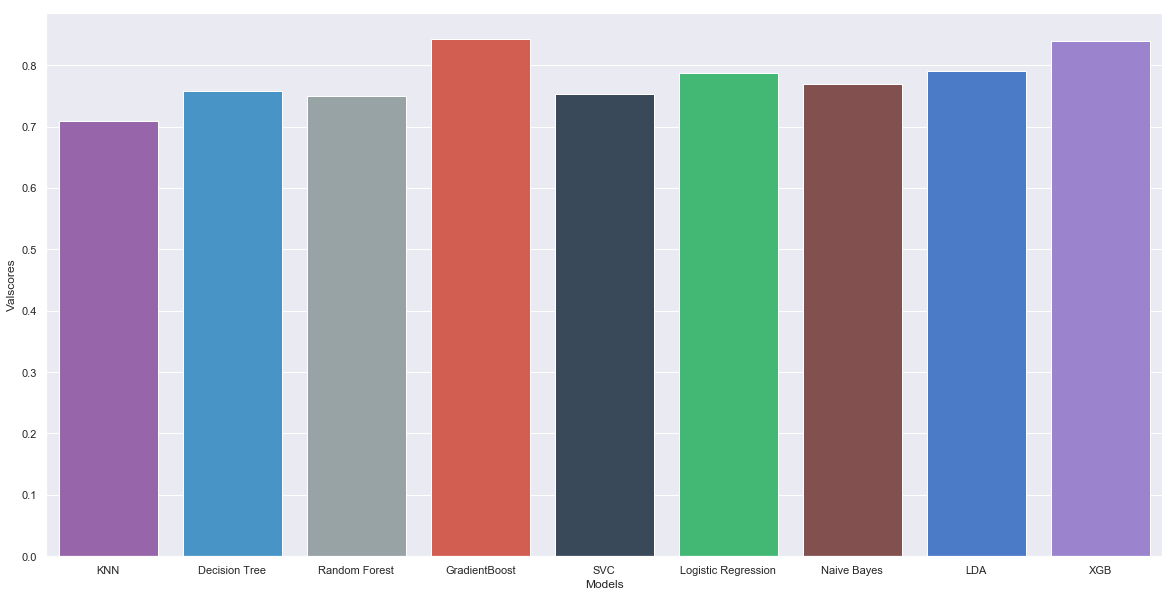

In [95]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#8b4946", "#3776db", "#9776db"]
sns.set_palette(flatui)
plt.figure(figsize=(20,10))
sns.barplot(x='Models',y='Valscores',data=df,palette=sns.color_palette())

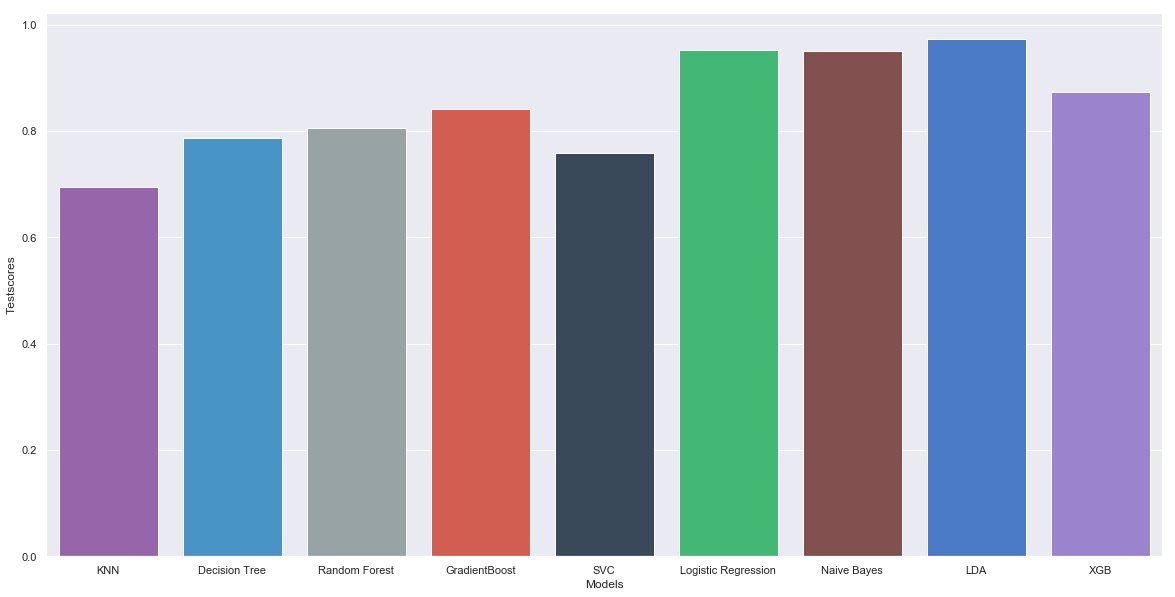

In [96]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#8b4946", "#3776db", "#9776db"]
sns.set_palette(flatui)
plt.figure(figsize=(20,10))
sns.barplot(x='Models',y='Testscores',data=df,palette=sns.color_palette())

In [146]:
prediction=model4.predict(X_test)

In [147]:
testpredict=model4.predict(test)
GBtest=accuracy_score(sub1,testpredict)
print(GBtest)

0.7583732057416268


In [148]:
submit=pd.DataFrame()

In [149]:
submit['PassengerId']=pid

In [150]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [151]:
submit['Survived']=testpredict

In [152]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [153]:
submit.to_csv('MySubmission5.csv')